In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import csv

In [2]:
historical_data = yf.download('AAPL', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
historical_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888058,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200
...,...,...,...,...,...,...
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300


In [8]:
#choose stocks with highest RoE
stocklist = []
stocks_name = []
stocksroe = []

with open ('list_stocks.csv', 'rt') as stocks_csv: #read the companies of s&p 500
    reader = csv.reader(stocks_csv)
    for i in stocks_csv:
        line = i.split(';')
        stocklist.append(line[1].strip())
        stocks_name.append(line[0].strip())


In [11]:

stocks = stocklist
#weights = [0.2, 0.2, 0.2, 0.2, 0.2] #percentage of the components in portfolio

historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected

close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price
portfolio_return = (close_price * len(stocks)).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

[*********************100%***********************]  29 of 29 completed


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\matplotlib\ticker.py:2101: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


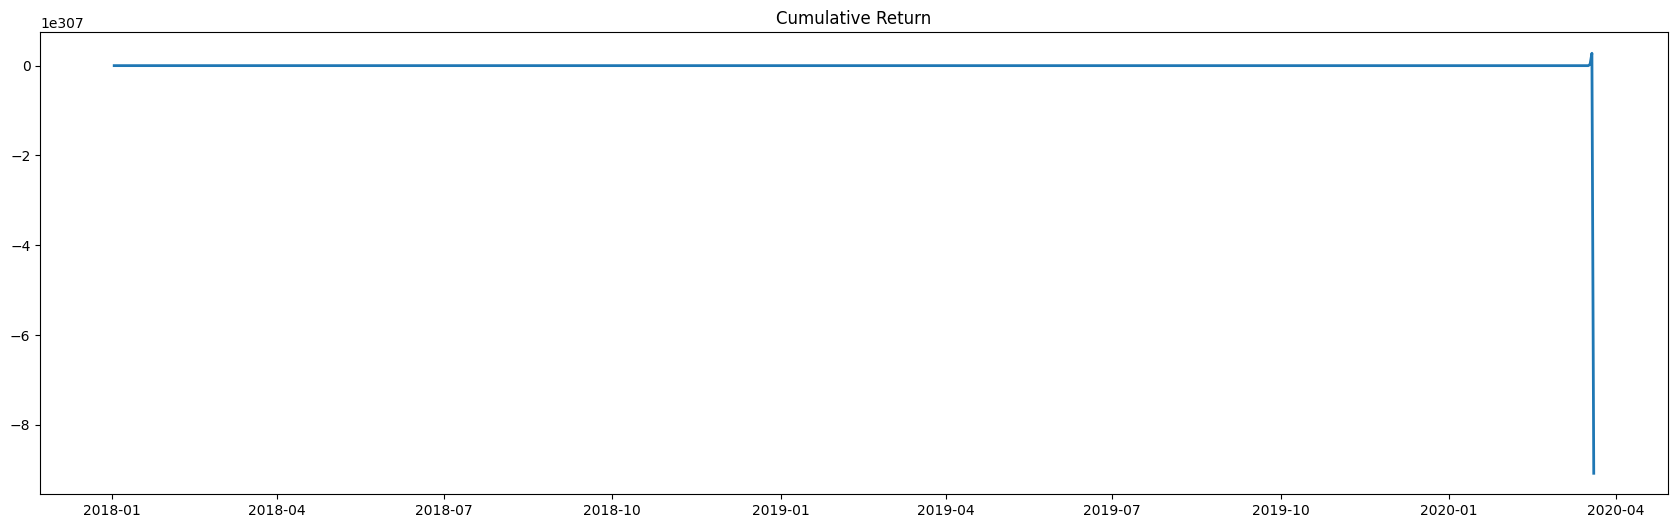

In [12]:
#data visualization
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

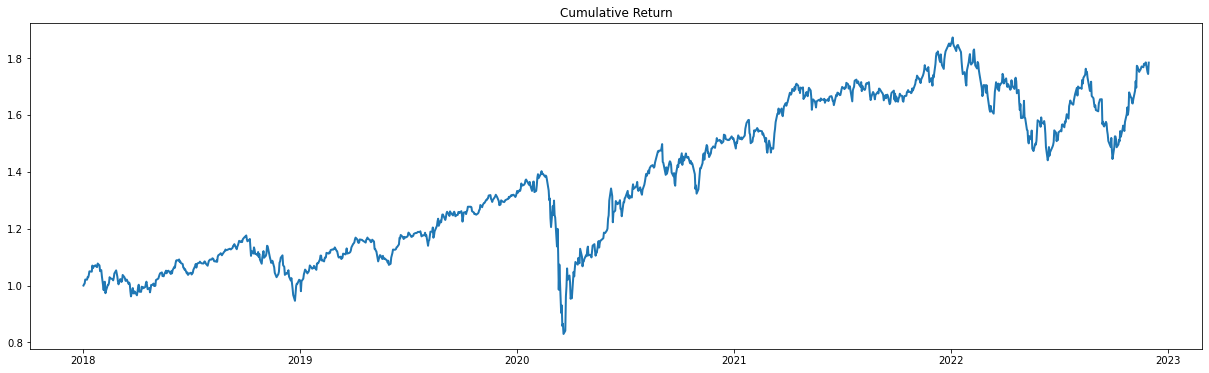

In [ ]:
#data visualization
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

In [13]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

In [14]:
# El Ratio de Sharpe es la rentabilidad que ofrece una inversión por cada unidad de riesgo que asume.
max_sharpe_ratio = np.argmax(portfolio_sharpe)
max_portfolio_weights = portfolio_weights[max_sharpe_ratio]
print(f"Max sharpe ratio: {portfolio_sharpe[max_sharpe_ratio]}")

print("portfolio")
for i in range(len(max_portfolio_weights)):
    print(close_price.columns[i], max_portfolio_weights[i])


Max sharpe ratio: 0.6620204715175455
portfolio
AAPL 0.06428059143208623
AMGN 0.06020991966141896
AXP 0.020282588137310768
BA 0.022492827960918796
CAT 0.037926094121871465
CRM 0.02120733133024604
CSCO 0.014407729458799668
CVX 0.0025350074505367955
DIS 0.021994641319219684
DOW 0.006468549250093968
GS 0.01726074516007084
HD 0.04741155561766314
HON 0.05753299367948317
IBM 0.05688574086185978
INTC 0.0032360474906341316
JNJ 0.003488078095149598
JPM 0.01774599255422423
KO 0.05965188057420778
MCD 0.0523077673833474
MMM 0.0022888967494609966
MRK 0.06250845627171708
MSFT 0.057961647763455
NKE 0.046606525129311294
PG 0.06047453112632854
TRV 0.03052136875116041
UNH 0.017561783349765655
V 0.04574158942605037
VZ 0.0212726011642876
WMT 0.06773651872932063


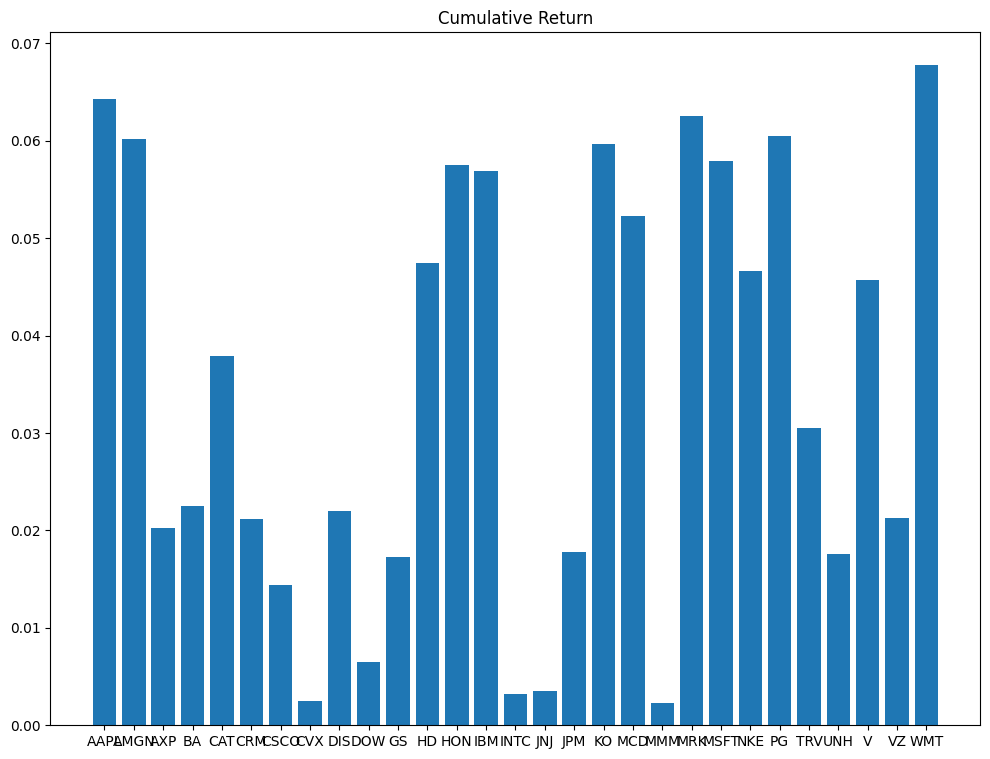

In [15]:
#Portfolio Composition with max sharpe ratio
#data 
x = close_price.columns
y = max_portfolio_weights

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, y)
ax.set_title('Cumulative Return')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

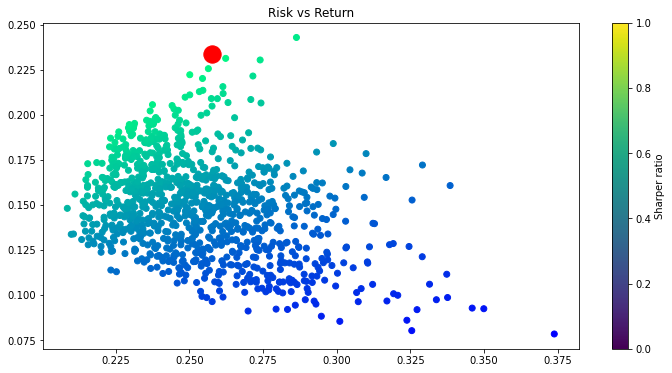

In [ ]:
# Efficient Frontier
max_ratio = max_sharpe_ratio

x = portfolio_risk
y = portfolio_returns


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, c=portfolio_sharpe, cmap='winter') #Efficient Frontier between risk and return
ax.set_title('Risk vs Return')

plt.scatter(x[max_ratio], y[max_ratio], color='r', marker='o', s=300) #sharpe ratio
plt.colorbar(label='Sharper ratio')

plt.show

In [ ]:
#Data of all stocks

stocks = stocklist
weights = []
for i in range(0,len(stocklist)):
    weights.append(100/len(stocklist))
    
historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected
close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price

# data for Power BI
close_price.to_csv('p_pct_change.csv')
historical_data['Close'].to_csv('p_close.csv')

portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

[*********************100%***********************]  29 of 29 completed


In [ ]:
# save files to power BI
def savecsv(filename, header, rows):
    with open (filename, "w", newline='' ,encoding='utf-8') as file:

        write = csv.writer(file)
        write.writerow(header)
        write.writerows(rows)

# portfolio weights
column_name = close_price.columns.to_list()
for i in ['Sharpe', 'returns', 'risk']:
    column_name.append(i)

datacsv1 = []

for i in range(len(portfolio_weights)):
    data = np.append(portfolio_weights[i], [portfolio_sharpe[i], portfolio_returns[i],portfolio_risk[i]])
    datacsv1.append(data)

savecsv("p_weights.csv", column_name, datacsv1)
